# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [283]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [284]:
penguins_df.shape

(344, 5)

In [285]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [286]:
penguins_df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [287]:
# dealing with null values
penguins_clean = penguins_df.dropna()
penguins_clean.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

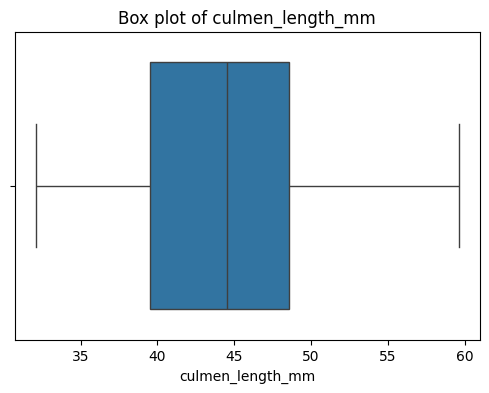

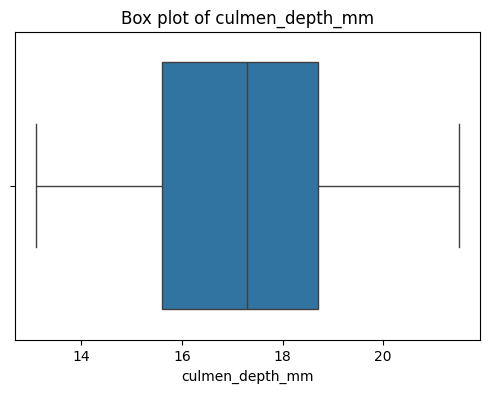

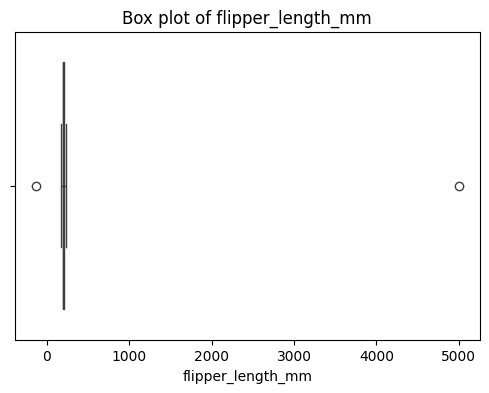

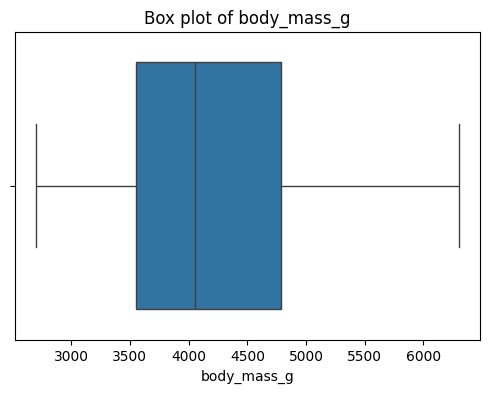

In [288]:
# Plotting individual box plots for each column in penguins_clean data
import seaborn as sns

# List of columns to plot
columns_to_plot = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Plotting each column
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=penguins_clean[column])
    plt.title(f'Box plot of {column}')
    plt.show()

In [289]:
penguins_clean = penguins_clean[(penguins_clean['flipper_length_mm'] < 1000) &
                              (penguins_clean['flipper_length_mm'] > 0)]
penguins_clean.shape

(333, 5)

In [290]:
# create dummy variables
dummy_var = pd.get_dummies(penguins_clean, drop_first = True)
dummy_var.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1


In [291]:
# scale the data using Standard Scaler
scale = StandardScaler()
scaled_data = scale.fit_transform(dummy_var)
penguins_preprocessed = pd.DataFrame(scaled_data, columns = dummy_var.columns)
penguins_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001


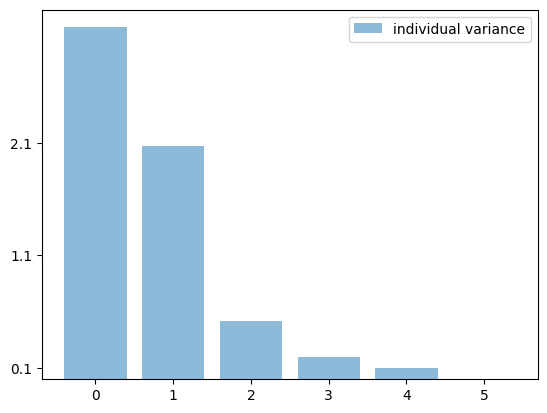

In [292]:
# perform principal component analysis
import numpy as np
pca = PCA()
pca.fit_transform(penguins_preprocessed)
pca_variance = pca.explained_variance_
n_components = sum(pca.explained_variance_ratio_>0.1)
plt.bar(range(6), pca_variance, alpha = 0.5, align = 'center', label = 'individual variance')
plt.yticks(np.arange(.1, 3))
plt.legend()
plt.show()

In [293]:
n_components

2

In [294]:
pca = PCA(n_components = n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)
penguins_PCA.shape

(333, 2)

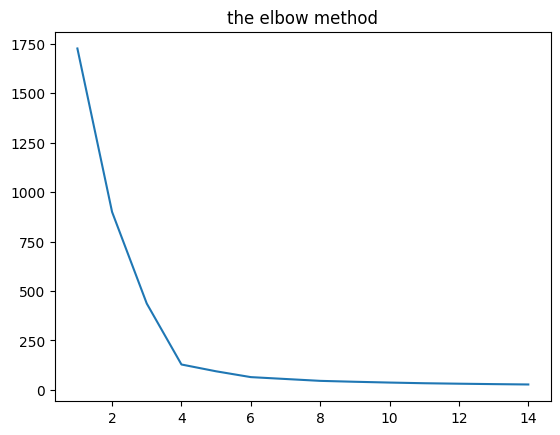

In [295]:
# elbow method
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(penguins_PCA)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('the elbow method')
plt.show()

In [296]:
# apply kmeans algorithm
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
kmeans.fit(penguins_PCA)

KMeans(n_clusters=4, random_state=42)

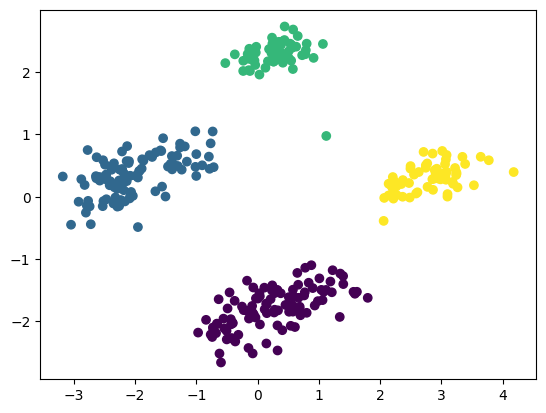

In [297]:
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c = kmeans.labels_, cmap='viridis')
plt.show()

In [298]:
penguins_clean['label'] = kmeans.labels_
penguins_clean.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,1
2,40.3,18.0,195.0,3250.0,FEMALE,1
4,36.7,19.3,193.0,3450.0,FEMALE,1
5,39.3,20.6,190.0,3650.0,MALE,0


In [299]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']

stat_penguins = penguins_clean[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,40.217757,17.611215,189.046729
2,45.545763,14.262712,212.779661
3,49.473770,15.718033,221.540984


* thank you